In [35]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# PREPROCESSING (CARA)

### * All code is directly copied and repurposed from AndrewCMN280.ipynb

In [36]:
df = pd.read_csv('Cara.csv')
df.columns

Index(['Date', 'Treatment', 'Day', 'Time', 'Engaged', 'Relevant', 'Attitude'], dtype='object')

In [37]:
df_1A = df[df['Treatment'] == '1A']
df_1B = df[df['Treatment'] == '1B']
df_2A = df[df['Treatment'] == '2A']
df_2B = df[df['Treatment'] == '2B']

In [38]:
# Replace values of row 19 with averages of other days
df_2A

,Date,Treatment,Day,Time,Engaged,Relevant,Attitude
16,11/4,2A,1.0,55.0,4.0,3.0,4.0
17,11/5,2A,2.0,90.0,4.0,4.0,4.0
18,11/6,2A,3.0,39.0,4.0,4.0,4.0
19,11/7,2A,4.0,-1.0,-1.0,-1.0,-1.0
20,11/8,2A,5.0,54.0,5.0,4.0,5.0
21,11/9,2A,6.0,124.0,2.0,4.0,4.0
22,11/10,2A,7.0,200.0,4.0,4.0,5.0


In [39]:
df_2A.loc[19] = ['10/31', '1B', 4, 94, 4, 4, 4]
df_2A

,Date,Treatment,Day,Time,Engaged,Relevant,Attitude
16,11/4,2A,1.0,55.0,4.0,3.0,4.0
17,11/5,2A,2.0,90.0,4.0,4.0,4.0
18,11/6,2A,3.0,39.0,4.0,4.0,4.0
19,10/31,1B,4.0,94.0,4.0,4.0,4.0
20,11/8,2A,5.0,54.0,5.0,4.0,5.0
21,11/9,2A,6.0,124.0,2.0,4.0,4.0
22,11/10,2A,7.0,200.0,4.0,4.0,5.0


In [40]:
# Drop final row of 2B (no data or possibility of interpolation)
df_2B.drop(27, inplace=True)
df_2B

C:\Users\super\AppData\Local\Temp\ipykernel_25460\2185700517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2B.drop(27, inplace=True)


,Date,Treatment,Day,Time,Engaged,Relevant,Attitude
24,11/11,2B,1.0,18.0,2.0,2.0,3.0
25,11/12,2B,2.0,12.0,4.0,2.0,3.0
26,11/13,2B,3.0,50.0,3.0,3.0,4.0
28,11/15,2B,5.0,20.0,2.0,3.0,4.0
29,11/16,2B,6.0,34.0,2.0,3.0,4.0
30,11/17,2B,7.0,-1.0,-1.0,-1.0,-1.0


In [41]:
def preprocess(df):
    data = df.copy(deep=True)
    data['cumulative_time'] = data['Time'].cumsum()
    data['average_mood'] = (data['Engaged'] + data['Relevant'] + data['Attitude']) / 3
    return data

In [42]:
df_1A = preprocess(df_1A)
df_1B = preprocess(df_1B)
df_2A = preprocess(df_2A)
df_2B = preprocess(df_2B)

In [43]:
df_1A.describe()

,Day,Time,Engaged,Relevant,Attitude,cumulative_time,average_mood
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,4.000000,65.571429,3.714286,4.714286,4.142857,265.571429,4.190476
std,2.160247,40.376797,1.704336,0.487950,1.214986,130.905637,1.051580
min,1.000000,26.000000,1.000000,4.000000,2.000000,70.000000,2.666667
25%,2.500000,31.500000,2.500000,4.500000,3.500000,192.000000,3.333333
50%,4.000000,61.000000,5.000000,5.000000,5.000000,288.000000,5.000000
75%,5.500000,93.500000,5.000000,5.000000,5.000000,329.000000,5.000000
max,7.000000,122.000000,5.000000,5.000000,5.000000,459.000000,5.000000


In [44]:
df_1B.describe()

,Day,Time,Engaged,Relevant,Attitude,cumulative_time,average_mood
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,4.000000,18.857143,2.142857,2.142857,1.571429,53.714286,1.952381
std,2.160247,12.667920,1.069045,0.690066,0.786796,47.839016,0.731021
min,1.000000,6.000000,1.000000,1.000000,1.000000,6.000000,1.000000
25%,2.500000,7.500000,1.500000,2.000000,1.000000,17.000000,1.500000
50%,4.000000,15.000000,2.000000,2.000000,1.000000,36.000000,1.666667
75%,5.500000,31.500000,2.500000,2.500000,2.000000,84.000000,2.500000
max,7.000000,33.000000,4.000000,3.000000,3.000000,132.000000,3.000000


In [45]:
df_2A.describe()

,Day,Time,Engaged,Relevant,Attitude,cumulative_time,average_mood
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,4.000000,93.714286,3.857143,3.857143,4.285714,300.857143,4.000000
std,2.160247,55.222925,0.899735,0.377964,0.487950,204.157152,0.430331
min,1.000000,39.000000,2.000000,3.000000,4.000000,55.000000,3.333333
25%,2.500000,54.500000,4.000000,4.000000,4.000000,164.500000,3.833333
50%,4.000000,90.000000,4.000000,4.000000,4.000000,278.000000,4.000000
75%,5.500000,109.000000,4.000000,4.000000,4.500000,394.000000,4.166667
max,7.000000,200.000000,5.000000,4.000000,5.000000,656.000000,4.666667


In [46]:
df_2B.describe()

,Day,Time,Engaged,Relevant,Attitude,cumulative_time,average_mood
count,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000
mean,4.000000,22.166667,2.00000,2.000000,2.833333,82.500000,2.277778
std,2.366432,17.758566,1.67332,1.549193,1.940790,49.862812,1.638653
min,1.000000,-1.000000,-1.00000,-1.000000,-1.000000,18.000000,-1.000000
25%,2.250000,13.500000,2.00000,2.000000,3.000000,42.500000,2.500000
50%,4.000000,19.000000,2.00000,2.500000,3.500000,90.000000,3.000000
75%,5.750000,30.500000,2.75000,3.000000,4.000000,124.750000,3.000000
max,7.000000,50.000000,4.00000,3.000000,4.000000,134.000000,3.333333


# Analysis

In [47]:
df_1A.columns

Index(['Date', 'Treatment', 'Day', 'Time', 'Engaged', 'Relevant', 'Attitude',
       'cumulative_time', 'average_mood'],
      dtype='object')

-----
We will first analyze the significance level of beta to determine whether or not we want to look at the averages or linear relationships of each dataframe. We will use a significance level of 0.05 for \* and 0.01 for \*\*

In [48]:
smf.ols('Time ~ Day', data=df_1A).fit().summary()

C:\Users\super\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.198
Method:                 Least Squares   F-statistic:                  0.009676
Date:                Mon, 02 Dec 2024   Prob (F-statistic):              0.925
Time:                        19:44:48   Log-Likelihood:                -35.274
No. Observations:                   7   AIC:                             74.55
Df Residuals:                       5   BIC:                             74.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.8571     37.346      1.844      0.125     -27.143     164.857
Day           -0.8214      8.351     -0.098      0.925     -22.288      20.645
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.027
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.850
Skew:                           0.536   Prob(JB):                        0.654
Kurtosis:                       1.672   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
smf.ols('Time ~ Day', data=df_1B).fit().summary()

C:\Users\super\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     29.96
Date:                Mon, 02 Dec 2024   Prob (F-statistic):            0.00277
Time:                        19:44:48   Log-Likelihood:                -20.360
No. Observations:                   7   AIC:                             44.72
Df Residuals:                       5   BIC:                             44.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8571      4.435     -0.644      0.548     -14.259       8.545
Day            5.4286      0.992      5.473      0.003       2.879       7.978
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.009
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.751
Skew:                           0.776   Prob(JB):                        0.687
Kurtosis:                       2.590   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Drop upper outlier on day 7
smf.ols('Time ~ Day', data=df_2A[df_2A['Day'] != 7]).fit().summary()

C:\Users\super\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     1.249
Date:                Mon, 02 Dec 2024   Prob (F-statistic):              0.326
Time:                        19:44:48   Log-Likelihood:                -27.945
No. Observations:                   6   AIC:                             59.89
Df Residuals:                       4   BIC:                             59.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.8000     29.069      1.610      0.183     -33.908     127.508
Day            8.3429      7.464      1.118      0.326     -12.381      29.067
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.217
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.733
Skew:                          -0.354   Prob(JB):                        0.693
Kurtosis:                       1.441   Cond. No.                         9.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
smf.ols('Time ~ Day', data=df_2B).fit().summary()

C:\Users\super\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                 -0.198
Method:                 Least Squares   F-statistic:                    0.1748
Date:                Mon, 02 Dec 2024   Prob (F-statistic):              0.697
Time:                        19:44:48   Log-Likelihood:                -25.100
No. Observations:                   6   AIC:                             54.20
Df Residuals:                       4   BIC:                             53.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.3095     16.697      1.696      0.165     -18.048      74.667
Day           -1.5357      3.673     -0.418      0.697     -11.733       8.662
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.429
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.618
Skew:                           0.505   Prob(JB):                        0.734
Kurtosis:                       1.795   Cond. No.                         9.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Only 2A is significant at (\*\*)

-----

In [52]:
def side_by_side(x, y, ylim):
    # Configure plt layout
    plt.clf()
    fig, axes = plt.subplots(1, 4, figsize=(15, 3))
    
    for ax in axes.flat:
        ax.set_ylim(top=ylim)

    # Plot 1A
    sns.scatterplot(data=df_1A, x=x, y=y, ax=axes[0])
    axes[0].axhline(y=df_1A[y].mean(), color='r', linestyle='--')
    
    # Plot 1B
    sns.regplot(data=df_1B, x=x, y=y, ax=axes[1])


    # Plot 2A
    sns.scatterplot(data=df_2A, x=x, y=y, ax=axes[2])
    axes[2].axhline(y=df_2A[y].mean(), color='r', linestyle='--')

    # Plot 2B
    sns.scatterplot(data=df_2B, x=x, y=y, ax=axes[3])
    axes[3].axhline(y=df_2B[y].mean(), color='r', linestyle='--')

    # Configure plt display
    plt.tight_layout()
    plt.show()

<Figure size 640x480 with 0 Axes>

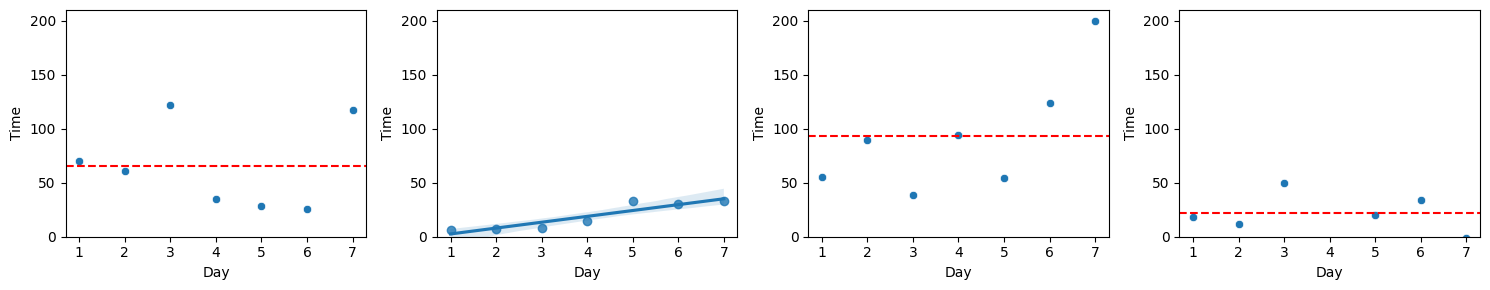

In [53]:
side_by_side('Day', 'Time', 210)

<Figure size 640x480 with 0 Axes>

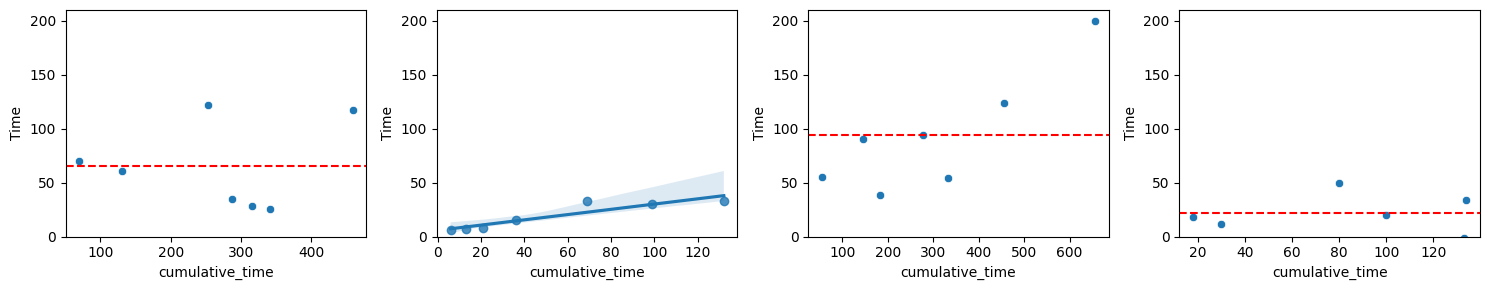

In [54]:
side_by_side('cumulative_time', 'Time', 210)

<Figure size 640x480 with 0 Axes>

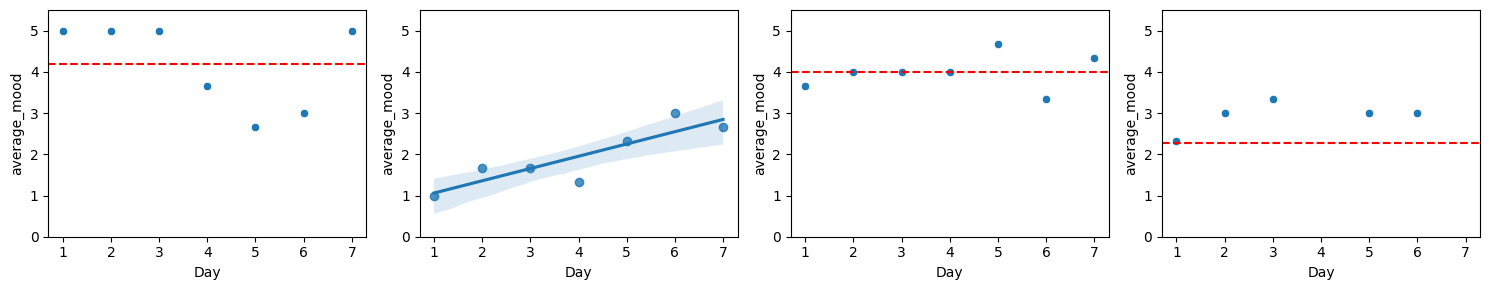

In [55]:
side_by_side('Day', 'average_mood', 5.5)

<Figure size 640x480 with 0 Axes>

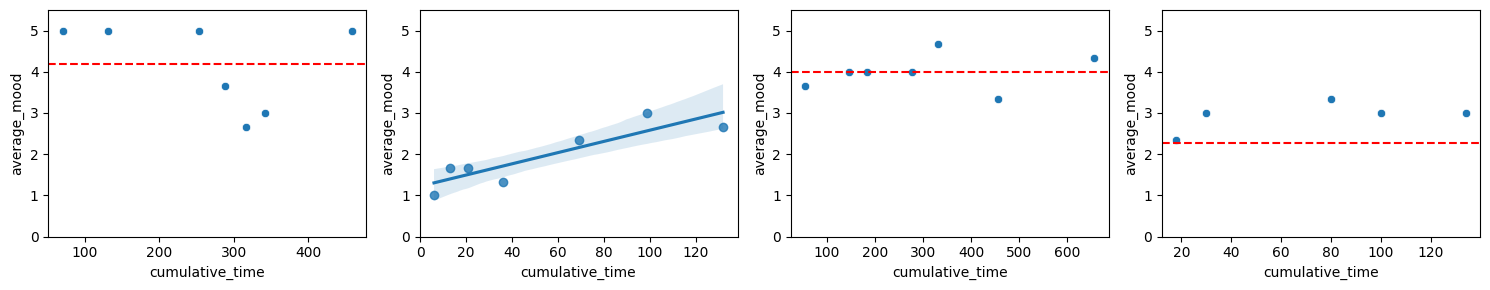

In [56]:
side_by_side('cumulative_time', 'average_mood', 5.5)

<Figure size 640x480 with 0 Axes>

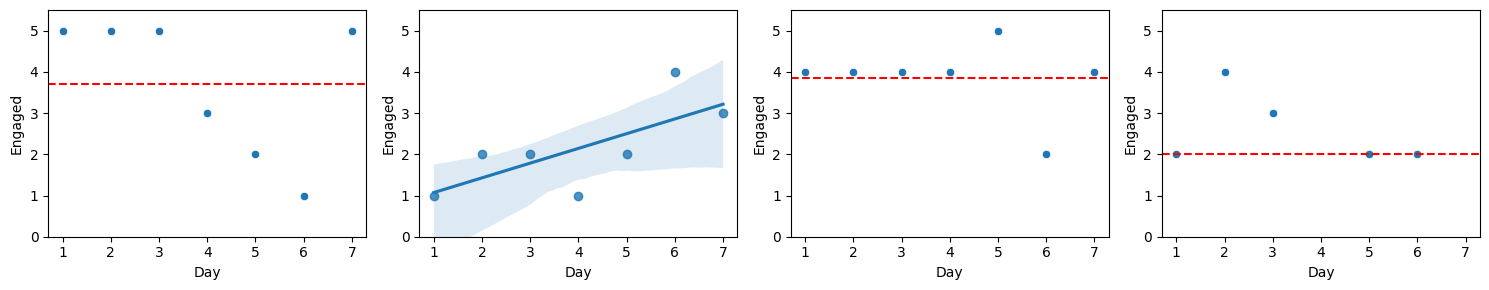

In [57]:
side_by_side('Day', 'Engaged', 5.5)

<Figure size 640x480 with 0 Axes>

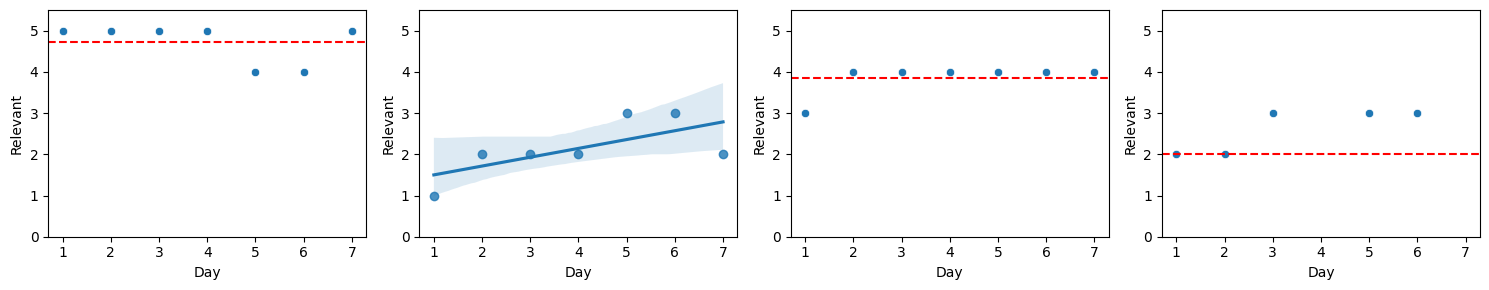

In [58]:
side_by_side('Day', 'Relevant', 5.5)

<Figure size 640x480 with 0 Axes>

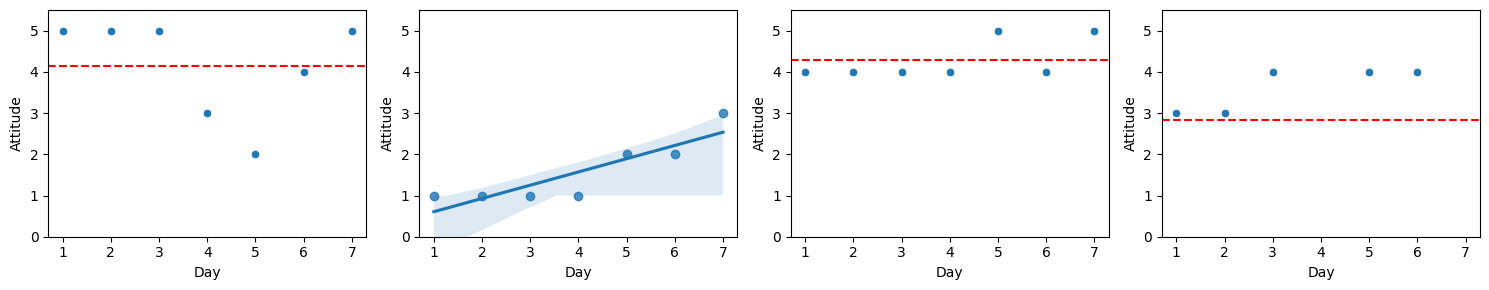

In [59]:
side_by_side('Day', 'Attitude', 5.5)

In [60]:
df[['Engaged', 'Relevant', 'Attitude']].corr()

,Engaged,Relevant,Attitude
Engaged,1.000000,0.779069,0.819921
Relevant,0.779069,1.000000,0.853795
Attitude,0.819921,0.853795,1.000000
